In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('sign_mnist_train.csv')
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [3]:
y=df['label']

In [4]:
del df['label']
x = np.matrix(df)

In [5]:
x

matrix([[107, 118, 127, ..., 204, 203, 202],
        [155, 157, 156, ..., 103, 135, 149],
        [187, 188, 188, ..., 195, 194, 195],
        ...,
        [174, 174, 174, ..., 202, 200, 200],
        [177, 181, 184, ...,  64,  87,  93],
        [179, 180, 180, ..., 205, 209, 215]], dtype=int64)

In [6]:
x.shape

(27455, 784)

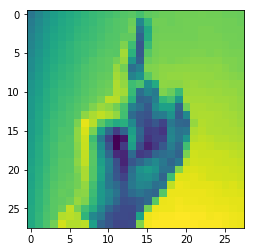

In [7]:
plt.imshow(x[0].reshape(28,28))

In [8]:
model=GradientBoostingClassifier(n_estimators=30,random_state=7,verbose=1)
model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=30,
              presort='auto', random_state=7, subsample=1.0, verbose=1,
              warm_start=False)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
x_train.shape,y_train.shape

((19218, 784), (19218,))

In [10]:
model.fit(x_train,y_train)

      Iter       Train Loss   Remaining Time 
         1       50592.7618           36.34m
         2       45916.2999           33.22m
         3       42352.8049           31.18m
         4       39437.0406           29.85m
         5       36884.2374           28.65m
         6       34571.9896           27.44m
         7       32504.2664           26.31m
         8       30699.0157           25.13m
         9       29009.3430           24.06m
        10       27534.4706           22.95m
        20       17271.8373           11.38m
        30       11759.4611            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=30,
              presort='auto', random_state=7, subsample=1.0, verbose=1,
              warm_start=False)

In [55]:
filename='Gragient.sav'

In [56]:
import pickle

In [57]:
pickle.dump(model, open(filename, 'wb'))

In [59]:
loaded_model = pickle.load(open(filename, 'rb'))

In [11]:
pred=model.predict(x_test)
pred

array([22, 24, 15, ..., 19, 20, 11], dtype=int64)

In [12]:
print(confusion_matrix(y_test,pred))

[[305   0   0   0   2   0   0   0   6   0   0   1   3   2   0   0   0   9
    0   0   0   0   0   0]
 [  0 274   0   1   3   1   0   1   1   4   0   1   0   1   1   0   4   1
    0   6   0   3   0   0]
 [  0   0 330   0   0   0   0   0   0   0   8   0   0  13   0   0   0   0
    2   0   0   0   0   0]
 [  0   2   0 298   6   1   0   3   2   5   0   0   0   0   1   1   3   2
    0  11   4   2  11   0]
 [  0   0   0   0 264   0   0   0   0   0   0   9   4   2   0   0   0   8
    0   0   0   0   0   1]
 [  0   1   0   4   0 320   2   0   2   5   3   0   0   3   1   0   1   0
    6   0   2   5   1   5]
 [  0   1   0   0   0   1 277   5   1   0   4   0   1   0   1   0   6   0
   19   0   2   1   1   2]
 [  2   1   3   0   0   3   9 270   0   0   7   0   0   2   1   0   1   0
   19   0   0   0   0   0]
 [  5   0   0   2   4   3   0   0 312   0   1   4   0   0   4   0   2   7
    4   1   1   0   0   9]
 [  0   0   0  10   0   7   0   0   1 265   0   0   2   0   2   0  13   0
    1   8   5   8

In [13]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.94      0.93      0.94       328
          1       0.96      0.91      0.93       302
          2       0.97      0.93      0.95       353
          3       0.85      0.85      0.85       352
          4       0.88      0.92      0.90       288
          5       0.90      0.89      0.90       361
          6       0.92      0.86      0.89       322
          7       0.89      0.85      0.87       318
          8       0.85      0.87      0.86       359
         10       0.84      0.80      0.82       331
         11       0.91      0.90      0.91       378
         12       0.82      0.82      0.82       305
         13       0.90      0.80      0.85       353
         14       0.92      0.93      0.93       334
         15       0.88      0.95      0.91       321
         16       0.94      0.90      0.92       384
         17       0.75      0.79      0.77       420
         18       0.84      0.83      0.84   

In [14]:
Gradient=metrics.accuracy_score(pred,y_test)
Gradient

0.8646351827121525

In [15]:
model1=BaggingClassifier(n_estimators=30,random_state=7,verbose=1)
model1

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=30, n_jobs=1, oob_score=False, random_state=7,
         verbose=1, warm_start=False)

In [16]:
model1.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 15.3min finished


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=30, n_jobs=1, oob_score=False, random_state=7,
         verbose=1, warm_start=False)

In [17]:
pred1=model1.predict(x_test)
pred1

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s finished


array([22, 24, 15, ..., 19, 20, 11], dtype=int64)

In [60]:
filename='Bagging.sav'

In [61]:
pickle.dump(model1, open(filename, 'wb'))

In [62]:
loaded_model = pickle.load(open(filename, 'rb'))

In [18]:
print(classification_report(y_test,pred1))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       328
          1       1.00      1.00      1.00       302
          2       1.00      1.00      1.00       353
          3       0.98      0.99      0.99       352
          4       0.99      1.00      0.99       288
          5       0.99      0.99      0.99       361
          6       0.98      1.00      0.99       322
          7       0.98      1.00      0.99       318
          8       0.99      0.99      0.99       359
         10       0.99      0.98      0.99       331
         11       0.99      0.99      0.99       378
         12       1.00      0.97      0.98       305
         13       0.99      0.99      0.99       353
         14       0.99      0.99      0.99       334
         15       0.98      0.99      0.99       321
         16       0.99      1.00      0.99       384
         17       1.00      0.98      0.99       420
         18       0.99      0.98      0.98   

In [19]:
print(confusion_matrix(y_test,pred1))

[[325   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   2]
 [  0 302   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 352   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 350   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   0]
 [  1   0   0   0 287   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 357   0   1   0   0   0   0   0   0   0   0   1   0
    1   0   0   0   0   1]
 [  0   0   0   0   0   0 321   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 318   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  2   1   0   0   0   0   0   0 354   0   0   1   1   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 326   0   0   0   0   1   0   0   0
    0   1   2   1

In [20]:
Bagging=metrics.accuracy_score(pred1,y_test)
Bagging

0.9885880781838048

In [21]:
model2=RandomForestClassifier(criterion='entropy',n_estimators=30,random_state=7,verbose=1)
model2.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.2min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=7, verbose=1, warm_start=False)

In [63]:
filename='Random.sav'

In [65]:
pickle.dump(model2, open(filename, 'wb'))

In [66]:
loaded_model = pickle.load(open(filename, 'rb'))

In [22]:
pred2=model2.predict(x_test)
pred2

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


array([22, 24, 15, ..., 19, 20, 11], dtype=int64)

In [23]:
print(confusion_matrix(y_test,pred2))

[[328   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 300   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
    0   1   0   0   0   0]
 [  0   0 352   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 349   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   3   0]
 [  0   0   0   0 288   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   1   0   0   0 357   0   0   0   0   2   0   0   0   0   0   0   0
    0   0   0   1   0   0]
 [  0   0   0   0   0   0 321   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0]
 [  0   0   0   0   0   0   0 318   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0 352   0   0   1   1   0   1   0   0   3
    0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0 329   0   0   0   0   0   0   1   0
    0   0   0   0

In [24]:
print(classification_report(y_test,pred2))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       328
          1       0.99      0.99      0.99       302
          2       1.00      1.00      1.00       353
          3       0.99      0.99      0.99       352
          4       1.00      1.00      1.00       288
          5       1.00      0.99      0.99       361
          6       1.00      1.00      1.00       322
          7       0.98      1.00      0.99       318
          8       0.99      0.98      0.98       359
         10       0.98      0.99      0.99       331
         11       0.99      0.99      0.99       378
         12       1.00      0.98      0.99       305
         13       0.99      0.99      0.99       353
         14       1.00      1.00      1.00       334
         15       0.99      1.00      0.99       321
         16       1.00      1.00      1.00       384
         17       0.98      0.99      0.99       420
         18       0.99      1.00      0.99   

In [26]:
list=[]
model4=LogisticRegression()
list.append(('logistics',model4))
model5=SVC()
list.append(('svm',model5))
model6=DecisionTreeClassifier()
list.append(('Decision',model6))
model7 = VotingClassifier(list).fit(x_train,y_train)


In [67]:
filename='Voting.sav'

In [68]:
pickle.dump(model7, open(filename, 'wb'))

In [69]:
loaded_model = pickle.load(open(filename, 'rb'))

In [27]:
pred3=model7.predict(x_test)
pred3

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([22, 24, 15, ..., 11, 20, 11], dtype=int64)

In [28]:
print(confusion_matrix(y_test,pred3))

[[328   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  2 299   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   0   0   0   0]
 [  2   2 349   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   3   1 348   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   1   1   1 284   0   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   0   0   0   0]
 [  0   0   6   6   0 348   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   0   0   0   0]
 [  0   1   0   1   0   1 319   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  2   0   0   2   1   1   5 306   0   0   0   0   0   0   0   1   0   0
    0   0   0   0   0   0]
 [  5   1   1   2   0   3   1   2 343   0   0   0   0   0   0   1   0   0
    0   0   0   0   0   0]
 [  1   2   0   0   1   3   1   1   3 317   0   0   0   0   0   2   0   0
    0   0   0   0

In [29]:
print(classification_report(y_test,pred3))

             precision    recall  f1-score   support

          0       0.88      1.00      0.94       328
          1       0.92      0.99      0.95       302
          2       0.95      0.99      0.97       353
          3       0.90      0.99      0.94       352
          4       0.95      0.99      0.97       288
          5       0.93      0.96      0.95       361
          6       0.90      0.99      0.94       322
          7       0.92      0.96      0.94       318
          8       0.87      0.96      0.91       359
         10       0.89      0.96      0.92       331
         11       0.93      0.92      0.92       378
         12       0.88      0.93      0.90       305
         13       0.91      0.88      0.89       353
         14       0.98      0.94      0.96       334
         15       0.97      0.94      0.95       321
         16       0.62      1.00      0.76       384
         17       1.00      0.78      0.88       420
         18       1.00      0.83      0.91   

In [54]:
voting=metrics.accuracy_score(pred3,y_test)
voting

0.9185383027801384

In [49]:
a=['Gradient','Bagging','Random','voting']

In [50]:
b=[85,98,99,92]

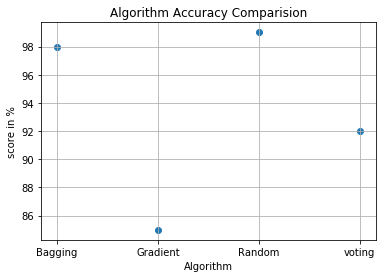

In [51]:
plt.scatter(x=a,y=b)
plt.grid()
plt.title('Algorithm Accuracy Comparision')
plt.xlabel('Algorithm')
plt.ylabel('score in %')
plt.show()

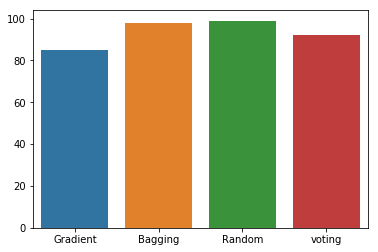

In [52]:
sns.barplot(x=a,y=b)